In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [94]:
data=pd.read_csv('/content/drive/MyDrive/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [95]:
data=data.drop(['Name','Ticket','PassengerId'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [96]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

since, cabin has 147 unique  values so i havbe decided to remove that column


In [97]:
from sklearn.preprocessing import LabelEncoder as le
ob=le()
data['Cabin']=ob.fit_transform(data['Cabin'])

In [98]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,147,S
1,1,1,female,38.0,1,0,71.2833,81,C
2,1,3,female,26.0,0,0,7.9250,147,S
3,1,1,female,35.0,1,0,53.1000,55,S
4,0,3,male,35.0,0,0,8.0500,147,S


In [99]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
dtype: int64

In [100]:
len(data)

891

In [101]:
data['Cabin'].unique()

array([147,  81,  55, 129, 145,  49, 111,  13,  63,  41, 101,  23,  71,
        21,  80, 142, 140, 122,  12,  91,  98,  52,  36, 116, 138, 107,
        45, 141,  61, 123,  18,  14,  69, 144,   9,  28,  43,   8, 103,
        93,  87,  78, 102,  83,  40, 134,  46,  57,  89,  54, 113,   3,
        31,  90,  62,  51,  74, 125,  72,  35,  76, 124,  65,  17,  56,
        85, 127, 146,  59, 104,  24, 131,  79,  47, 115, 128,  10,  50,
        53,  86, 126,  97, 117, 133,   1,  25,  64,  96,  42, 121, 106,
        39,  88,  26,  27,  20,  82,  77,   2,  48,  75,   0, 135,  29,
         4,  95, 110, 114,   5,  33,   7, 108, 132,  58,  38,  34, 109,
        32,  19, 139,  73, 120,  84,  66, 137,  15, 105,  67, 100, 118,
        92, 136, 143,  22, 112,  44,  94,  11,  16,  37, 130,  68,  99,
       119,   6,  70,  30,  60])

data['Cabin

In [102]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [103]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [104]:
data=data.dropna()

as you see there are only 3 unique values 

In [105]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [106]:
data.replace(['S', 'C', 'Q'],[0,1,2],inplace=True)

In [107]:
data['Embarked'].unique()

array([0, 1, 2])

In [108]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,147,0
1,1,1,female,38.000000,1,0,71.2833,81,1
2,1,3,female,26.000000,0,0,7.9250,147,0
3,1,1,female,35.000000,1,0,53.1000,55,0
4,0,3,male,35.000000,0,0,8.0500,147,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,147,0
887,1,1,female,19.000000,0,0,30.0000,30,0
888,0,3,female,29.699118,1,2,23.4500,147,0
889,1,1,male,26.000000,0,0,30.0000,60,1


In [109]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [110]:
data['Sex'].replace(['male', 'female'],[0,1],inplace=True)

In [111]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,147,0
1,1,1,1,38.0,1,0,71.2833,81,1
2,1,3,1,26.0,0,0,7.9250,147,0
3,1,1,1,35.0,1,0,53.1000,55,0
4,0,3,0,35.0,0,0,8.0500,147,0


In [112]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.335549,0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.249264,0.108669
Pclass,-0.335549,1.000000,-0.127741,-0.327954,0.081656,0.016824,-0.548193,0.682416,0.043835
Sex,0.541585,-0.127741,1.000000,-0.089434,0.116348,0.247508,0.179958,-0.088496,0.118593
Age,-0.074673,-0.327954,-0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.227925,0.009499
SibSp,-0.034040,0.081656,0.116348,-0.231875,1.000000,0.414542,0.160887,0.040777,-0.060606
Parch,0.083151,0.016824,0.247508,-0.178232,0.414542,1.000000,0.217532,-0.031916,-0.079320
Fare,0.255290,-0.548193,0.179958,0.088604,0.160887,0.217532,1.000000,-0.502555,0.063462
Cabin,-0.249264,0.682416,-0.088496,-0.227925,0.040777,-0.031916,-0.502555,1.000000,-0.051148
Embarked,0.108669,0.043835,0.118593,0.009499,-0.060606,-0.079320,0.063462,-0.051148,1.000000


In [113]:
from sklearn.model_selection import train_test_split
train=data.drop('Survived',axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(train,data['Survived'],random_state=5,test_size=0.25)

In [127]:
model1=LogisticRegression(max_iter=900,C=0.5)
model1.fit(X_train,Y_train)

LogisticRegression(C=0.5, max_iter=900)

In [128]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [129]:
predicted1=model1.predict(X_test)


a = metrics.precision_recall_fscore_support(predicted1, Y_test)
print("Accuracuy Score: ",a)
f1score_model1=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model1)

Accuracuy Score:  (array([0.89189189, 0.77333333]), array([0.88590604, 0.78378378]), array([0.88888889, 0.77852349]), array([149,  74]))
f1Score : 0.8888888888888888


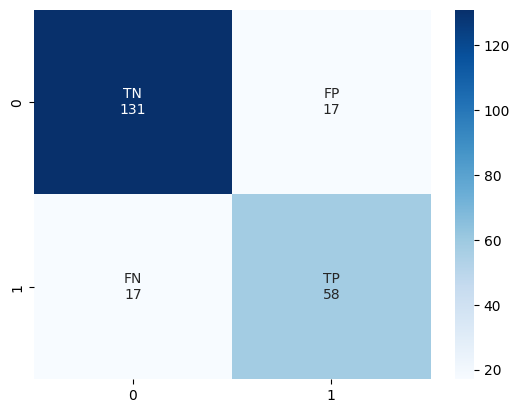

In [125]:

cnf_matrix = confusion_matrix(predicted1,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [123]:
model2=KNeighborsClassifier(n_neighbors=110)
model2.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=110)

In [124]:
predicted2=model2.predict(X_test)

a = metrics.precision_recall_fscore_support(predicted2, Y_test)
print("Accuracuy Score: ",a)
f1score_model1=2*(a[0][0]*a[1][0])/(a[0][0]+a[1][0])
print("f1Score :",f1score_model1)

Accuracuy Score:  (array([0.88513514, 0.4       ]), array([0.74431818, 0.63829787]), array([0.80864198, 0.49180328]), array([176,  47]))
f1Score : 0.808641975308642


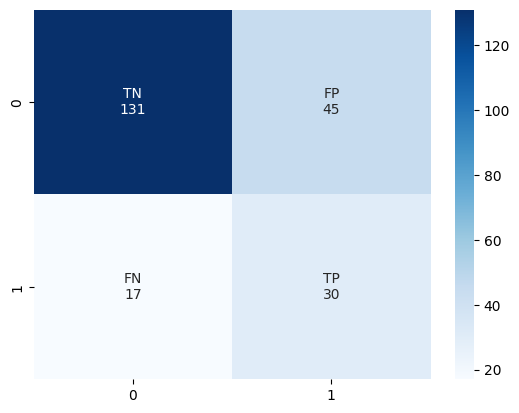

In [126]:

cnf_matrix = confusion_matrix(predicted2,Y_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');